# Run this cell first!

In [1]:
# Download a static FFmpeg build and add it to PATH.
exist = !which ffmpeg
if not exist:
  !curl https://johnvansickle.com/ffmpeg/releases/ffmpeg-release-amd64-static.tar.xz -o ffmpeg.tar.xz \
     && tar -xf ffmpeg.tar.xz && rm ffmpeg.tar.xz
  ffmdir = !find . -iname ffmpeg-*-static
  path = %env PATH
  path = path + ':' + ffmdir[0]
  %env PATH $path
print('')
!which ffmpeg
print('Done!')


/usr/local/bin/ffmpeg
Done!


In [ ]:
!pip install tensorflow_docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import dependencies
import sys
sys.path.append('python/')
import numpy as np
import matplotlib.pyplot as plt
import time
startTime = time.time()
from ipywidgets.widgets import HTML
import tensorflow_docs.vis.embed as savior
import matplotlib.animation as ani


In [ ]:
def CalculatePosition(radius,velocity,time,dt):
    """
    Calculates positions of multiple objects around a circle after some time with interval dt.

    Any set of units may be used, provided they match -- 
    for example, if using a radius of meters and time in seconds, velocity should be in meters per second and the time increments should be in seconds.

    :parameters:
        radius : [array]
            Radius of the objects from the center. Units to match velocity.
        velocity : [array]
            Velocity of the objects. Units to match radius and time. Length must match length of radius.
        time : [int]
            Maximum time. Units to match velocity. If not divisible by dt, the final time provided may exceed this value by a number less than dt.
        dt : [int]
            Time increment. Units to match time.

    :returns:
        Two [ndarray]s of x-position (first array) and y-position (second array) of all objects. These arrays are stored such that each row represents a single time 
        and each column represents a single object.  
        [1darray] of associated time.  

    :example:
        >>> import numpy as np #To generate the arrays
        >>> radius = np.array([1,2,3,4,5])              # in m
        >>> velocity = np.array([0.1,0.2,0.3,0.4,0.5])  # in m/s
        >>> time = 100                                  # in s
        >>> dt = 33                                     # in s
        >>> CalculatePosition(radius,velocity,time,dt)
        (array([[ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ],
            [-0.98747977, -1.97495954, -2.96243931, -3.94991908, -4.93739885],
            [ 0.95023259,  1.90046518,  2.85069778,  3.80093037,  4.75116296],
            [-0.88919115, -1.77838231, -2.66757346, -3.55676461, -4.44595576],
            [ 0.80588396,  1.61176792,  2.41765187,  3.22353583,  4.02941979]]), 
        array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
            [-0.15774569, -0.31549139, -0.47323708, -0.63098278, -0.78872847],
            [ 0.31154136,  0.62308273,  0.93462409,  1.24616545,  1.55770682],
            [-0.45753589, -0.91507179, -1.37260768, -1.83014358, -2.28767947],
            [ 0.59207351,  1.18414703,  1.77622054,  2.36829406,  2.96036757]]), 
        array([  0,  33,  66,  99, 132]))
    """
    
    # Initial conditions
    theta = 0
    xini = radius * np.cos(theta)
    yini = radius * np.sin(theta)
    t = 0
    
    # Store positions and time
    xposition = [xini]
    yposition = [yini]
    storedtime = [t]
    
    # Calculate positions
    while t < time:
        t += dt
        x = radius * np.cos((velocity/radius)*t)
        y = radius * np.sin((velocity/radius)*t)
        
        xposition.append(x)
        yposition.append(y)
        storedtime.append(t)
    
    # Make an array
    xposition = np.array(xposition)
    yposition = np.array(yposition)
    storedtime = np.array(storedtime)
    
    return xposition,yposition,storedtime

###############################################

def MultiplePositions(radius,velocity,time,dt):
    """
    Calculates transposed positions of multiple objects around a circle after some time with interval dt. Setup for the animation.

    Any set of units may be used, provided they match -- 
    for example, if using a radius of meters and time in seconds, velocity should be in meters per second and the time increments should be in seconds.

    :parameters:
        radius : [array]
            Radius of the objects from the center. Units to match velocity.
        velocity : [array]
            Velocity of the objects. Units to match radius and time. Length must match length of radius.
        time : [int]
            Maximum time. Units to match velocity. If not divisible by dt, the final time provided may exceed this value by a number less than dt.
        dt : [int]
            Time increment. Units to match time.

    :returns:
        Two [ndarray]s of x-position (first array) and y-position (second array) of all objects. These arrays are stored such that each row represents a single object 
        and each column represents a single time.  
        [1darray] of associated time.

    :example:
        >>> radius = np.array([1,2,3,4,5])              # in m
        >>> velocity = np.array([0.1,0.2,0.3,0.4,0.5])  # in m/s
        >>> time = 100                                  # in s
        >>> dt = 50                                     # in s
        >>> MultiplePositions(radius,velocity,time,dt)
        (array([[ 1.        ,  0.28366219, -0.83907153],
            [ 2.        ,  0.56732437, -1.67814306],
            [ 3.        ,  0.85098656, -2.51721459],
            [ 4.        ,  1.13464874, -3.35628612],
            [ 5.        ,  1.41831093, -4.19535765]]), 
        array([[ 0.        , -0.95892427, -0.54402111],
            [ 0.        , -1.91784855, -1.08804222],
            [ 0.        , -2.87677282, -1.63206333],
            [ 0.        , -3.8356971 , -2.17608444],
            [ 0.        , -4.79462137, -2.72010555]]), 
        array([ 0, 50]))
    """
    
    # Stop the calculation when the outermost point takes a whole revolution
    # Outermost point position
    outerposition = radius[len(radius)-1]
    
    # Calculate the positions of outermost point:
    xouter = CalculatePosition(radius[len(radius)-1],velocity[len(radius)-1],time,dt)[0]
    
    # Circumference of the outer circle
    circouter = 2*np.pi*outerposition
    
    # Distance the outer object traveled
    distance = 0
    istop = 0
        
    # New time
    storedtime = CalculatePosition(radius[0],velocity[0],time,dt)[2]
    for t in storedtime:
        if distance < circouter:
            distance = velocity[len(radius)-1]*t
        else:
            istop = np.where(storedtime == t)[0]     # find index of the numpy array 
            break
                   
    istop = int(istop)
    newstoredtime = storedtime[:istop-1]
            
    xmultiple = []
    ymultiple = []

    for i in range(len(radius)):
        x = CalculatePosition(radius[i],velocity[i],time,dt)[0]
        y = CalculatePosition(radius[i],velocity[i],time,dt)[1]
        xmultiple.append(x)
        ymultiple.append(y)

    xmultiple = np.array(xmultiple)
    ymultiple = np.array(ymultiple)
    
    return xmultiple, ymultiple, newstoredtime

###############################################

def PlotRotationCurve(radius,velocity,title,
                      xlabel='Radius (km)',ylabel='Velocity (km/s)',
                      xlim=1,
                      ylim=0.1):
    """
    Plot rotation curve, given the radius and velocity.

    Any set of units may be used, provided they match -- 
    for example, if using a radius of meters, velocity should be in meters per unit time and the labels should correctly indicate both.

    :parameters:
        radius : [array]
            Radius of the objects from the center. Units to match velocity.
        velocity : [array]
            Velocity of the objects. Units to match radius and time. Length must match length of radius.
        title : [string]
            Title of the plot.
        xlabel : [string]
            X-label of the plot. 
            
            :default: 'Radius (km)'
        ylabel : [string]
            Y-label of the plot. 
            
            :default: 'Velocity (km/s)'
        xlim : [float]
            X-limit of the plot. 
            
            :default: 1
        ylim : [float]
            Y-limit of the plot. 
            
            :default: 0.1

    :returns:
        None

    :example:
        >>> radius = np.array([1,2,3,4,5])              # in m
        >>> velocity = np.array([0.1,0.2,0.3,0.4,0.5])  # in m/s
        >>> PlotRotationCurve(radius,velocity,'Rigid Body Rotation Curve')

        .. image:: ../../images/PlotRotationCurveExample.png
            :alt: A plot, titled 'Rigid Body Rotation Curve', with the radii above on the x-axis and the velocities above on the y-axis
    """
    
    # Convert title to string
    title = str(title)
    
    # Plot
    fig = plt.figure(figsize=(6,6),dpi=100)
    ax = plt.axes()
    
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    ax.set_xlabel(xlabel,color='white')
    ax.set_ylabel(ylabel,color='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    
    plt.title(title,color='white',fontsize='14')
    plt.scatter(radius,velocity,color='khaki')
    plt.plot(radius,velocity,color='white')
    plt.xlim(0,np.max(radius)+xlim)
    plt.ylim(0,np.max(velocity)+ylim)

    plt.show()
    
###############################################

def MakeAnimation(radius,velocity,time,dt,filename,title,
                 xlim=1,ylim=1,
                 size=False,masses=None):
    """
    Animation of rotating objects around a circle.

    Any set of units may be used, provided they match -- 
    for example, if using a radius of meters and time in seconds, velocity should be in meters per second and the time increments should be in seconds. 

    :parameters:
        radius : [array]
            Radius of the objects from the center. Units of km.
        velocity : [array]
            Velocity of the objects. Units to match time with radial units of km. Length must match length of radius.
        time : [int]
            Maximum time. Units to match velocity. If not divisible by dt, the final time provided may exceed this variable by a number less than dt.
        dt : [int]
            Time increment. Units to match time.
        filename : [string]
            File name to save animation.
        title : [string]
            Title of the plot.
        xlim : [float]
            X-limit of the plot. 
            
            :default: 1
        ylim : [float]
            Y-limit of the plot. 
            
            :default: 0.1
        size : [bool]
            Size of dots, based on masses. If True, the sizes of dots depend on masses. 
            
            :default: False
        masses : [array]
            Masses of objects, when needed. 
            
            :default: None

    :returns:
        None

    :example:
        >>> radius = np.array([1,2,3,4,5])              # in m
        >>> velocity = np.array([0.1,0.2,0.3,0.4,0.5])  # in m/s
        >>> time = 100
        >>> dt = 1
        >>> MakeAnimation(radius, velocity, time, dt, 
        ...     filename='images/solarsystem.gif', 
        ...     title='Planet-like Rotation')    

        .. image:: ../../images/solarsystem.gif
            :alt: An animation of planet-like rotation, in which the five planets are, coincidentally, moving like a rigid body. The x-axis and y-axis are both labeled with units of km with ranges of -6 to +6. Below the title 'Planet-like Rotation' is a counter indicating the current number of seconds, in scientific notation, resetting itself periodically. Other than this timer, the animation appears continuious.
    """
    
    # Extract x and y positions, and time
    xpositions = MultiplePositions(radius,velocity,time,dt)[0]
    ypositions = MultiplePositions(radius,velocity,time,dt)[1]
    #storedtimes = CalculatePosition(radius,velocity,time,dt)[2]
    storedtimes = MultiplePositions(radius,velocity,time,dt)[2]
    
    # Sizes of dots based on masses
    if size == True:   # use an array of masses as an input for sizes
        area = [s * 5e-25 for s in masses]
    if size == False:  # use a default size
        area = 100
                      
    # Create a movie write object, set frame rate
    writer = ani.FFMpegWriter(fps=25)

    # Create a figure, 8"x8" in size
    fig = plt.figure(figsize=(8,8))
    
    # Change background color of the plot
    fig.patch.set_facecolor('black')
    ax = plt.axes()
    ax.set_facecolor('black')
    ax.set_facecolor('black')
    ax.set_xlabel('x (km)',color='white')
    ax.set_ylabel('y (km)',color='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
  
    # Convert filename and title to string
    filename = str(filename)
    title = str(title)

    # Set things up to save frames to a movie:
    #   fig = the figure the writer will record from
    with writer.saving(fig, filename, 100):

    # Loop
        i = 0            # start counter
        for t in storedtimes:
            plt.cla()
            for r in radius:
                    circle = plt.Circle((0, 0), r, color='white', fill=False)
                    plt.gca().add_patch(circle)
            plt.scatter(xpositions[:,i],ypositions[:,i],s=area,color='khaki')
            plt.suptitle(title,color='white',fontsize='18')
            plt.title('{:.1e} seconds'.format(t),color='white')
            plt.xlim(-np.max(radius)-xlim,np.max(radius)+xlim)
            plt.ylim(-np.max(radius)-1,np.max(radius)+ylim)
            plt.xlabel('x (km)',color='white',fontsize='14')
            plt.ylabel('y (km)',color='white',fontsize='14')
            ax.tick_params(axis='x', colors='white')
            ax.tick_params(axis='y', colors='white')
            i += 1
            
            # Save the current plot as a movie frame
            writer.grab_frame()
        
        plt.close(fig)    # Do not display the image

# Introduction to Rotation Curves

A rotation curve plots the rotational velocity of stars in a galaxy in terms of their distance from the center, also known as the radius. Using photometric data of the luminous matter, a rotation curve of a galaxy can be created. It is used to estimate the mass inside a radius by equating the centripetal force to the gravitational force:

\begin{equation}
\frac{mv^2}{r}=\frac{G M_{enc}(r)}{r^2}
\end{equation}

where:
        $v$ = rotational velocity
        $G$ = gravitational constant
        $M_{enc}(r)$ = enclosed mass as a function of radius
        $r$ = radius or distance from the center of the galaxy
    

Rotation curves of some spiral galaxies reveal a discrepancy in the measured and luminous mass. The relationship between the rotational velocity and mass is important to the study of Dark Matter. Plotting the rotation curves of edge-on spiral galaxies and their components can be used as a tool to find the Dark Matter rotation curve and its corresponding mass.

This notebook aims to demonstrate three different rotation curve types - rigid body (frisbee) rotation, planet-like rotation, and flat rotation.

### Rigid body (frisbee) rotation

The most straight-forward rotation curve is that of a rigid body, i.e. a solid disk. The rotational velocity in this case is proportional to the radius of the rotating object, which can be denoted by:

\begin{equation}
v \propto r
\end{equation}

Because of this, the rigid body has a rotation curve that increases linearly with radius. To demonstrate this, let's create two arrays for the radius and the rotational velocity called `radiusRB` and `velocityRB`, respectively:

### Try: What does the graph $r$ vs. $v$ look like? Draw it on a sticky note.
### BONUS: Try plotting it here!

In [ ]:
radiusRB = np.array([1,2,3,4,5])
velocityRB = np.array([0.1,0.2,0.3,0.4,0.5])


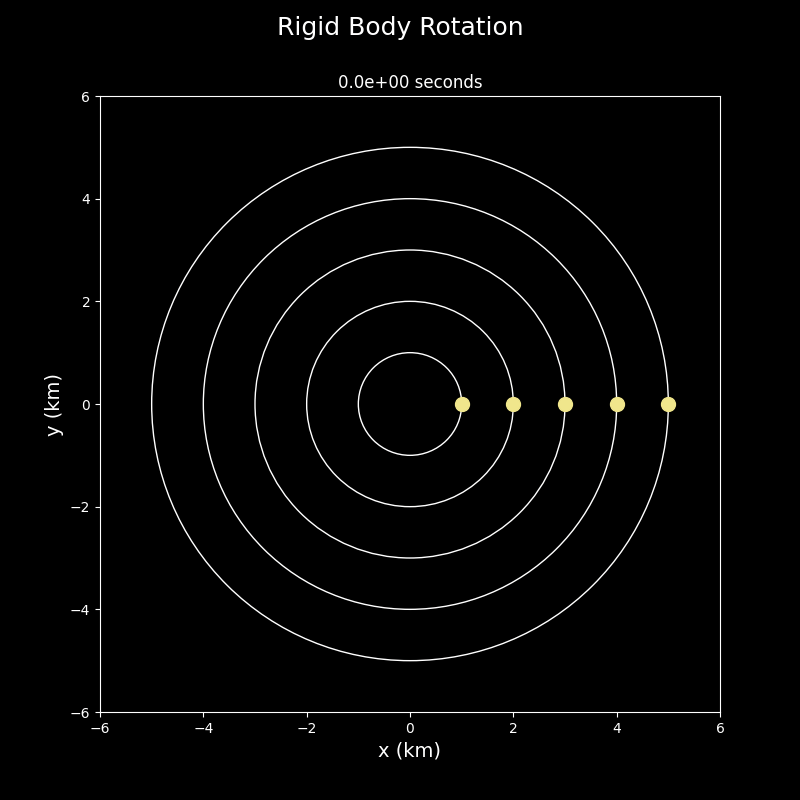

In [ ]:
# Make the animation
MakeAnimation(radiusRB,velocityRB,100,1,'rigidbody.gif','Rigid Body Rotation')
# display it
savior.embed_file("rigidbody.gif")

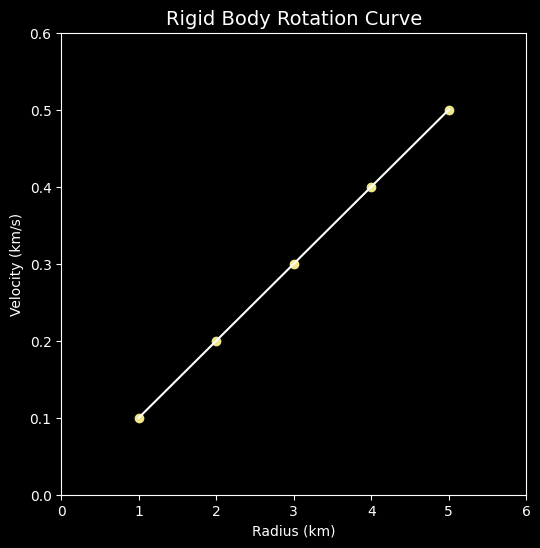

In [ ]:
PlotRotationCurve(radiusRB,velocityRB,'Rigid Body Rotation Curve')

In rigid body rotation, all pieces of the body must maintain the same relative position to each other throughout the rotation. Another way to think about this is that all parts of a rigid body have the same angular velocity -- that is, the rate at which their angle from the horizontal changes is the same.

### Planet-like rotation

Non-rigid rotating bodies have more flexibility in their rotation. The most well-known example is the Keplerian model, which models orbital rotation in solar systems and planetary motion. This model has most of its mass concentrated in the center of the rotating object with satellites free to orbit around the center. With planet-like rotation, rotational velocity is inversely proportional to the square root of the radius:

\begin{equation}
v \propto \frac{1}{\sqrt{r}}
\end{equation}

One example is our Solar System with eight planets orbiting the Sun at the center. 

### What does the graph $1/\sqrt r$ vs. $v$ look like? Draw it on a sticky note. 
### BONUS: try plotting it on here!

Try: Find the missing parameters!

In [ ]:
# Parameters
G = 6.67408e-11         # Gravitational constant (in m^3 kg^-1 s^-2)
AU = 1.496e11           # AU Astronomical Unit (in meters)


# Masses of the planets (M) in kg

M_Earth = 1     
M_Sun = 1
M_Mercury = 1
M_Venus = 1
M_Mars = 1
M_Jupiter = 1
M_Saturn = 1
M_Uranus = 1
M_Neptune = 1

# Distances of planets from the Sun (r) in meters
r_Earth = AU
r_Mercury = 1*AU
r_Venus = 1*AU
r_Mars = 1*AU
r_Jupiter = 1*AU
r_Saturn = 1*AU
r_Uranus = 1*AU
r_Neptune = 1*AU



In [ ]:
# CALCULATIONS
# Make array of masses
massesSS = np.array([M_Mercury,M_Venus,M_Earth,M_Mars,M_Jupiter,M_Saturn,M_Uranus,M_Neptune])

# Make array of radii
radiusSS = np.array([r_Mercury,r_Venus,r_Earth,r_Mars,r_Jupiter,r_Saturn,r_Uranus,r_Neptune])

# compute the velovities
# Orbital velocity of planets (v) in m/s
v_Mercury = np.sqrt((G*M_Sun)/r_Mercury)
v_Venus = np.sqrt((G*(M_Sun+M_Mercury))/r_Venus)
v_Earth = np.sqrt((G*(M_Sun+M_Mercury+M_Venus))/r_Earth)
v_Mars = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth))/r_Mars)
v_Jupiter = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars))/r_Jupiter)
v_Saturn = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter))/r_Saturn)
v_Uranus = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter+M_Saturn))/r_Uranus)
v_Neptune = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter+M_Saturn+M_Uranus))/r_Neptune)

# Make array of velocities
velocitySS = np.array([v_Mercury,v_Venus,v_Earth,v_Mars,v_Jupiter,v_Saturn,v_Uranus,v_Neptune])

In [ ]:
# Make animation
MakeAnimation(1e-3*radiusSS,1e-3*velocitySS,   # change distance unit to km, velocity unit to km/s
                         5e10,1e7,                        # time and dt
                         'solarsystem.gif','Planet-like Rotation',
                         1e8,1e8,                         # xlim and ylim
                         size=True,masses=massesSS)    
# Display animation
savior.embed_file("solarsystem.gif")

In [ ]:
PlotRotationCurve(1e-3*radiusSS,1e-3*velocitySS,
                  'Planet-like Rotation Curve',
                  xlabel='Radius (km)',ylabel='Velocity (km/s)',
                  xlim=1e8,ylim=5)

In a planet-like rotation, none of the bodies are attached to one another in any way, so they can move in relation to one another. Often, there is a single, dominant source of mass at the center -- in the case of our Solar system, the Sun is massive enough that we can ignore the masses of planets in our calculations. However, if there is a significant amount of mass between the center and the bodies we are observing, we may get different results...

### Expected galactic rotation

Similar to planet-like rotation, the rotation curve of galaxies should decline at larger radii with the difference of rotational velocities of stars and gas gradually increasing closer to the center. A quick sketch is shown below to compare with other rotation curves but an intensive calculation of this expected galactic rotation is included in the upcoming workshop modules. 

In [ ]:
# Arbitrary distance and velocity for animation and plot
radiusEGR = np.array([1,2,2.5,3,3.5,4,5,6,7])
velocityEGR = np.array([0.10,0.23,0.27,0.29,0.27,0.24,0.21,0.19,0.18])

In [ ]:
# make the animation
MakeAnimation(radiusEGR,velocityEGR,200,1,'expgalacticrotation.gif','Expected Galactic Rotation')
# Display animation
savior.embed_file("expgalacticrotation.gif")

In [ ]:
PlotRotationCurve(radiusEGR,velocityEGR,'Expected Galactic Rotation')

### Flat rotation

The mass distribution of a galaxy based on luminous matter is similar to the mass distribution of the Keplerian model. Surprisingly, some of the rotation curves of galaxies are entirely different than the rotation curve of planetary motion. The curve for spiral galaxies quickly increases from the center to a relatively constant velocity: 

\begin{equation}
v \sim constant
\end{equation}

This type of rotation curve suggests there is more mass spread throughout the galaxy than we can see. This 'missing mass' is what we call Dark Matter.

In [ ]:
# Arbitrary distance and velocity for animation and plot
radiusFR = np.array([1,2,3,4,5,6,7])
velocityFR = np.array([0.1,0.24,0.29,0.31,0.31,0.31,0.31])

In [ ]:
# Make animation
MakeAnimation(radiusFR,velocityFR,
                         200,1,                                       # time and dt
                         'flatrotation.gif','Flat Rotation')   # file name and title of plot
# Display animation
savior.embed_file("flatrotation.gif")

In [ ]:
PlotRotationCurve(radiusFR,velocityFR,'Flat Rotation Curve')

We see that velocity increases as we move outward. This is because, for a galaxy, mass is spread out throughout the galaxy, rather than being largely concentrated at the center. However, what we would expect to see is for the velocity to start dropping off at some point because the concentration of mass is still expected to be lower as we approach the edges, even if not negligibly so. This is why the flatness seems to indicate that there is 'missing' mass in our data.

### Comparison of expected galactic rotation and flat rotation

In [ ]:
# Plot
fig = plt.figure(figsize=(6,6),dpi=100)
ax = plt.axes()
    
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xlabel('Radius (km)',color='white')
ax.set_ylabel('Velocity (km/s)',color='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
    
plt.title('Comparing Flat and Expected Galactic Rotation',color='white',fontsize='14')
plt.scatter(radiusEGR,velocityEGR,color='khaki')
plt.plot(radiusEGR,velocityEGR,color='red',label='Expected')
plt.scatter(radiusFR,velocityFR,color='khaki')
plt.plot(radiusFR,velocityFR,color='white',label='Flat')
plt.xlim(0,np.max(radiusEGR)+1)
plt.ylim(0,np.max(velocityEGR)+0.1)
plt.legend()
plt.show()

Comparing the expected galactic rotation curve and the observed flat rotation curve in one plot reveals the discrepancies that can be further investigated in the following modules. 

In [ ]:
#NBVAL_IGNORE_OUTPUT
#Because the calculation time naturally varies.
# Calculation time
executionTime3 = (time.time() - startTime)
ttt3=executionTime3/60
print(f'Execution time: {ttt3:.2f} minutes')

### References

>Carroll, B. W., &amp; Ostlie, D. A. (2018). **An Introduction to Modern Astrophysics**. Cambridge University Press. <br><br>
>Williams, D. (2021, December 27). **Planetary Fact Sheet**. NASA. Retrieved February 27, 2022, from https://nssdc.gsfc.nasa.gov/planetary/factsheet/